<a href="https://colab.research.google.com/github/RepoRecipee/IIIT-PROJECTS-AND-LABS/blob/main/AIML_III_Module_3_project_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Students Internship Batch of 2024
# Project : Data Visualization, Choosing K-value and Appreciating Feature Scaling and Standardization






# Binary Classification Task:Iris dataset




INTRODUCTION:The goal of visualizing the Iris dataset is to understand the distribution and relationships between these features and how they vary across different species of iris flowers.
df = pd.read_csv("C:\\Users\\SNEHA\\Downloads\\effects-of-covid-19-on-trade-at-15-december-2021-provisional.csv")


# **Exploratory Data Analysis (EDA) and Statistical Analysis**

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('whitegrid')

import warnings
warnings.filterwarnings('ignore')

In [42]:
from google.colab import files

# Upload the file
uploaded = files.upload()


Saving supermarket_sales - Sheet1 (1).csv to supermarket_sales - Sheet1 (1).csv


In [44]:
super_data = pd.read_csv('supermarket_sales - Sheet1 (1).csv')

In [45]:
# View top 10 rows of the superstore  dataset
super_data.head(10)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2/25/2019,14:36,Ewallet,413.04,4.761905,20.6520,5.8
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2/24/2019,11:38,Ewallet,735.60,4.761905,36.7800,8.0
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,1/10/2019,17:15,Credit card,72.52,4.761905,3.6260,7.2
9,692-92-5582,B,Mandalay,Member,Female,Food and beverages,54.84,3,8.2260,172.7460,2/20/2019,13:27,Credit card,164.52,4.761905,8.2260,5.9


# Identification of variables and data types

In [46]:
super_data.shape

(1000, 17)

In [47]:
#describing each column
super_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000


Let us see distribution and also boxplot for outliers of feature "Quantity".

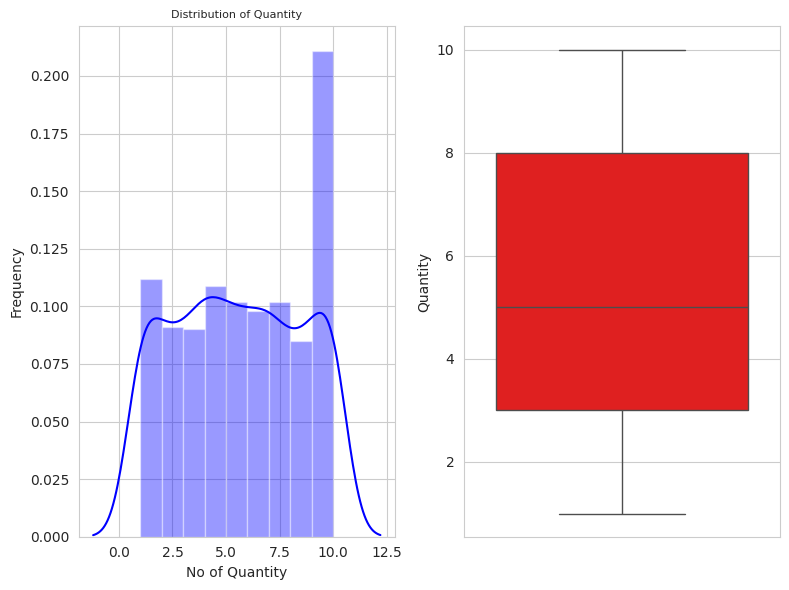

In [50]:
fig,axes = plt.subplots(nrows=1,ncols=2,figsize = (8,6))

plot00=sns.distplot(super_data['Quantity'],ax=axes[0],color='b')
axes[0].set_title('Distribution of Quantity',fontdict={'fontsize':8})
axes[0].set_xlabel('No of Quantity')
axes[0].set_ylabel('Frequency')
plt.tight_layout()


plot01=sns.boxplot(data=super_data['Quantity'], ax=axes[1],orient = 'v', color='r')
plt.tight_layout()

## TASK-1 :
## Find out the "Correlation" between the different attributes present in the data.
## Also plot a heatmap (refer Seaborn documentation) for the correlation values

In [52]:
# Convert relevant columns to numeric type if possible
# For instance, if 'Invoice ID' is the problematic column and should be numeric:
super_data['Invoice ID'] = pd.to_numeric(super_data['Invoice ID'], errors='coerce')

# Calculate correlations on numeric columns only
numeric_data = super_data.select_dtypes(include=['number'])
correlation_matrix = numeric_data.corr()
print(correlation_matrix)

                         Invoice ID  Unit price  Quantity    Tax 5%     Total  \
Invoice ID                      NaN         NaN       NaN       NaN       NaN   
Unit price                      NaN    1.000000  0.010778  0.633962  0.633962   
Quantity                        NaN    0.010778  1.000000  0.705510  0.705510   
Tax 5%                          NaN    0.633962  0.705510  1.000000  1.000000   
Total                           NaN    0.633962  0.705510  1.000000  1.000000   
cogs                            NaN    0.633962  0.705510  1.000000  1.000000   
gross margin percentage         NaN         NaN       NaN       NaN       NaN   
gross income                    NaN    0.633962  0.705510  1.000000  1.000000   
Rating                          NaN   -0.008778 -0.015815 -0.036442 -0.036442   

                             cogs  gross margin percentage  gross income  \
Invoice ID                    NaN                      NaN           NaN   
Unit price               0.633962    

Perfect Positive Correlations:

Tax 5%, Total, cogs, and gross income are perfectly correlated with each other (correlation = 1). This indicates these variables move together exactly, likely because they are directly calculated from each other.
Strong Positive Correlation:

Quantity has a strong positive correlation with cogs, Tax 5%, and Total (correlation = 0.705). This suggests that as the quantity sold increases, the cost of goods sold, tax, and total amount increase significantly.
Moderate Positive Correlation:

Unit price has a moderate positive correlation with Tax 5%, Total, cogs, and gross income (correlation = 0.634). Higher unit prices tend to increase the tax, total amount, cost of goods sold, and gross income.
Weak or No Correlation:

Rating has a very weak negative correlation with most other variables (correlation ~ -0.036). This implies that customer ratings do not significantly relate to unit price, quantity, tax, total amount, cost of goods sold, or gross income.

Checking if the data is balanced or imbalanced

Rating
6.0     26
6.6     24
4.2     22
9.5     22
6.5     21
        ..
4.0     11
5.3     11
8.3     11
4.6      8
10.0     5
Name: count, Length: 61, dtype: int64


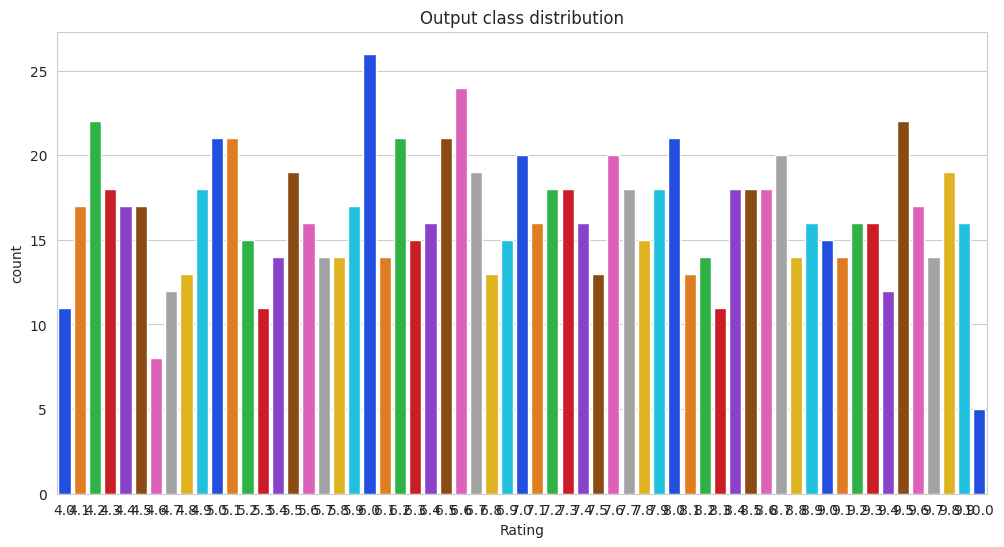

In [59]:
plt.figure(figsize=(12,6))
sns.countplot(x='Rating',data=super_data, palette='bright')
plt.title("Output class distribution")

print(super_data['Rating'].value_counts())

observation

The rating values range from 4.0 to 10.0.
The most frequent rating is 6.0, with 26 occurrences.
Ratings like 6.6, 4.2, and 9.5 are also quite common, with 24, 22, and 22 occurrences respectively.

# Scatter matrix of data

## TASK-2: Display a pairplot using Seaborn for the super dataset, with the 'rating' as the hue.

<Axes: xlabel='Rating', ylabel='Quantity'>

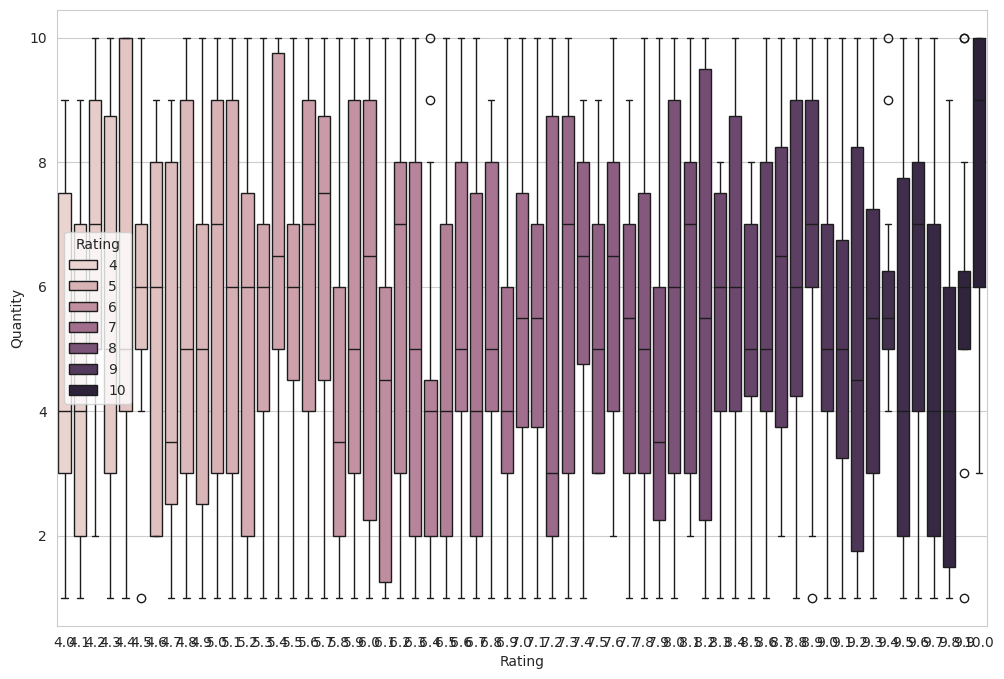

In [60]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Rating', y='Quantity',data=super_data, hue='Rating')

In [66]:
## TASK 3: Display a boxplot between the number of Rating and Quantity.

Prevalence of Quantity vs Unit price
Let's try to find out the prevalence of quantityand its relation to their price. Please note that the range of normal price is 10 to 55.


[ ]


In [69]:
normalData = super_data[(super_data['Unit price'] >= 98) & (super_data['Quantity'] <= 105)]
normalData['Quantity'].value_counts()

,count
Quantity,
9,7
2,7
6,6
8,4
3,4
10,3
7,3
1,3
5,2


In [76]:
notNormalData = super_data[(super_data['Total'] < 15) | (super_data['Unit price'] >= 2009700)]
notNormalData['Unit price'].value_counts()

,count
Unit price,
12.54,1
13.98,1
12.78,1
12.09,1
10.17,1


<Axes: xlabel='Total', ylabel='Unit price'>

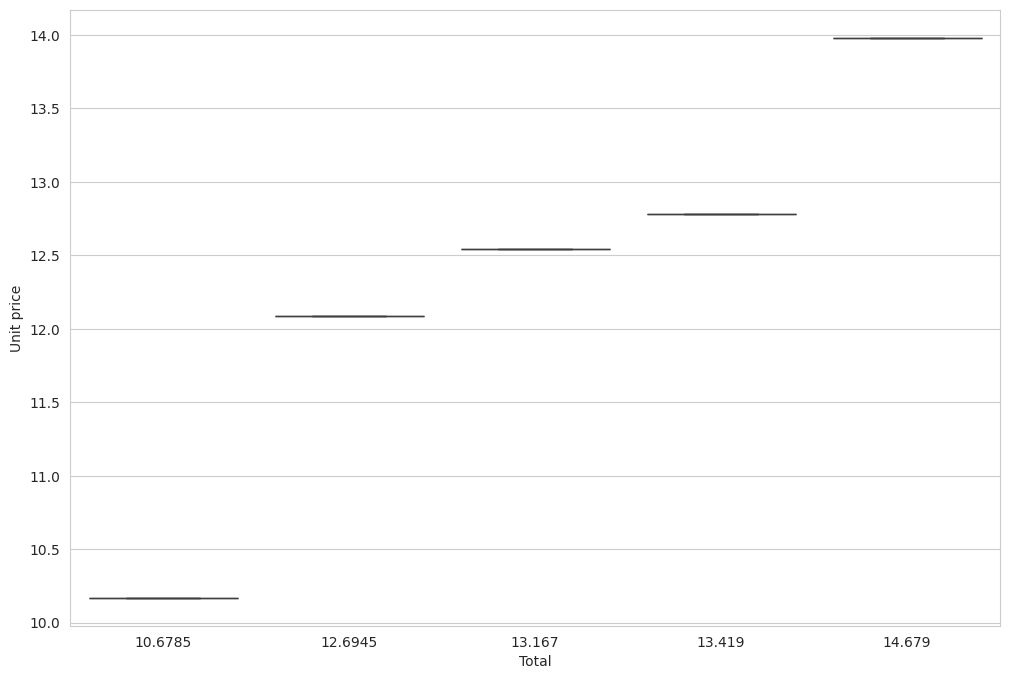

In [78]:
plt.figure(figsize=(12,8))
sns.boxplot(x='Total', y='Unit price',data=notNormalData)

Quantity vs Rating





In [79]:
## TASK-5: Display a boxplot between Quantity and Rating.

# The Importance of Standardizing Data

In [80]:
unchanged_data = super_data.drop('Rating',axis=1)

In [81]:
unchanged_data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income
0,NaN,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415
1,NaN,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200
2,NaN,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155
3,NaN,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880
4,NaN,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175
996,NaN,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900
997,NaN,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920
998,NaN,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910


Choosing a K Value
Let's go ahead and use the elbow method to pick a good K Value!

# Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.

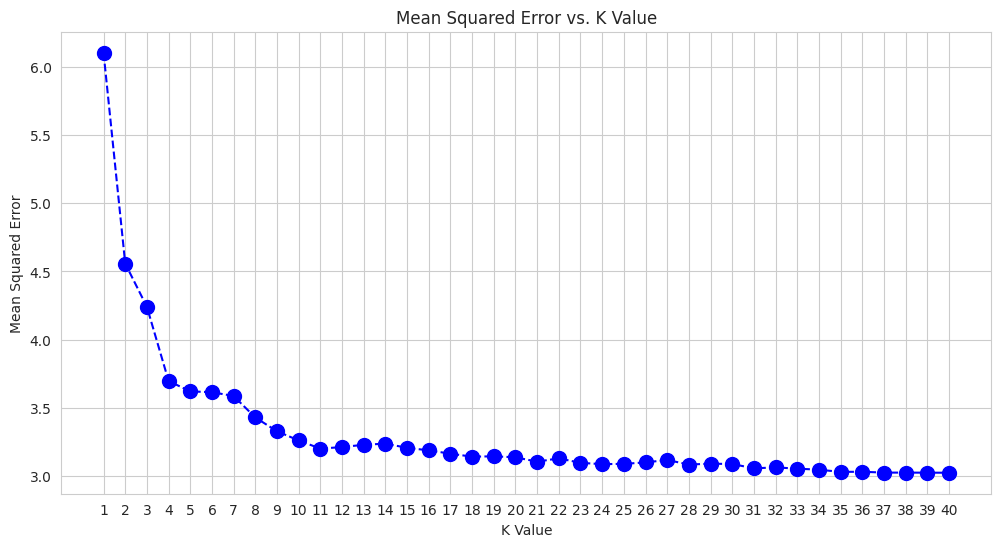

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Sample data loading for illustration, replace with your actual data
# df = pd.read_csv('path_to_your_csv_file.csv')

# Assuming 'Rating' is the target variable and the rest are features
X = super_data.drop('Rating', axis=1)
y = super_data['Rating']

# Identify columns with string (object) dtype
object_cols = X.select_dtypes(include=['object']).columns

# Apply Label Encoding to convert string columns to numerical
label_encoder = LabelEncoder()
for col in object_cols:
    X[col] = label_encoder.fit_transform(X[col])

# Handle missing values
# Initialize the imputer
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like 'median', 'most_frequent', etc.

# Fit the imputer on the entire data and transform both training and testing data
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

error_rate = []

# Loop through different K values (let's say 1 to 40)
for k in range(1, 41):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(mean_squared_error(y_test, y_pred))

# Plot the error rates for different K values
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), error_rate, marker='o', linestyle='dashed', color='blue', markersize=10)
plt.title('Mean Squared Error vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error')
plt.xticks(range(1, 41))  # Optional: To ensure all K values are visible on the x-axis
plt.grid(True)  # Optional: To add grid lines for better readability
plt.show()


# Standardize the Variables

Standardization (also called z-score normalization) is the process of putting different variables on the same scale. Standardization transforms your data such that the resulting distribution has a mean of 0 and a standard deviation of 1.

Z=X−μσ


[ ]


In [89]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [99]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Assuming 'Rating' is the target variable and the rest are features
X = super_data.drop('Rating', axis=1)

# Identify numerical and categorical columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Create transformers for numerical and categorical features
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fit and transform the data
X_transformed = preprocessor.fit_transform(X)

# Now you can fit the scaler on the transformed data,
# but set with_mean=False to avoid centering the sparse data
scaler = StandardScaler(with_mean=False)
scaler.fit(X_transformed)

StandardScaler(with_mean=False)

In [102]:
# Fit and transform the data using the preprocessor (from previous code)
X_transformed = preprocessor.fit_transform(X)

# Now you can fit the scaler on the transformed data
scaler = StandardScaler(with_mean=False)
scaler.fit(X_transformed)

# Transform the preprocessed data
scaled_data = scaler.transform(X_transformed)

In [109]:
# Fit and transform the data using the preprocessor (from previous code)
X_transformed = preprocessor.fit_transform(X)

# Now you can fit the scaler on the transformed data, but avoid scaling sparse data
# scaler = StandardScaler(with_mean=False)
# scaler.fit()

# Comparing Accuracy before and after **Standardization**

NameError: name 'unchanged_test_scores' is not defined

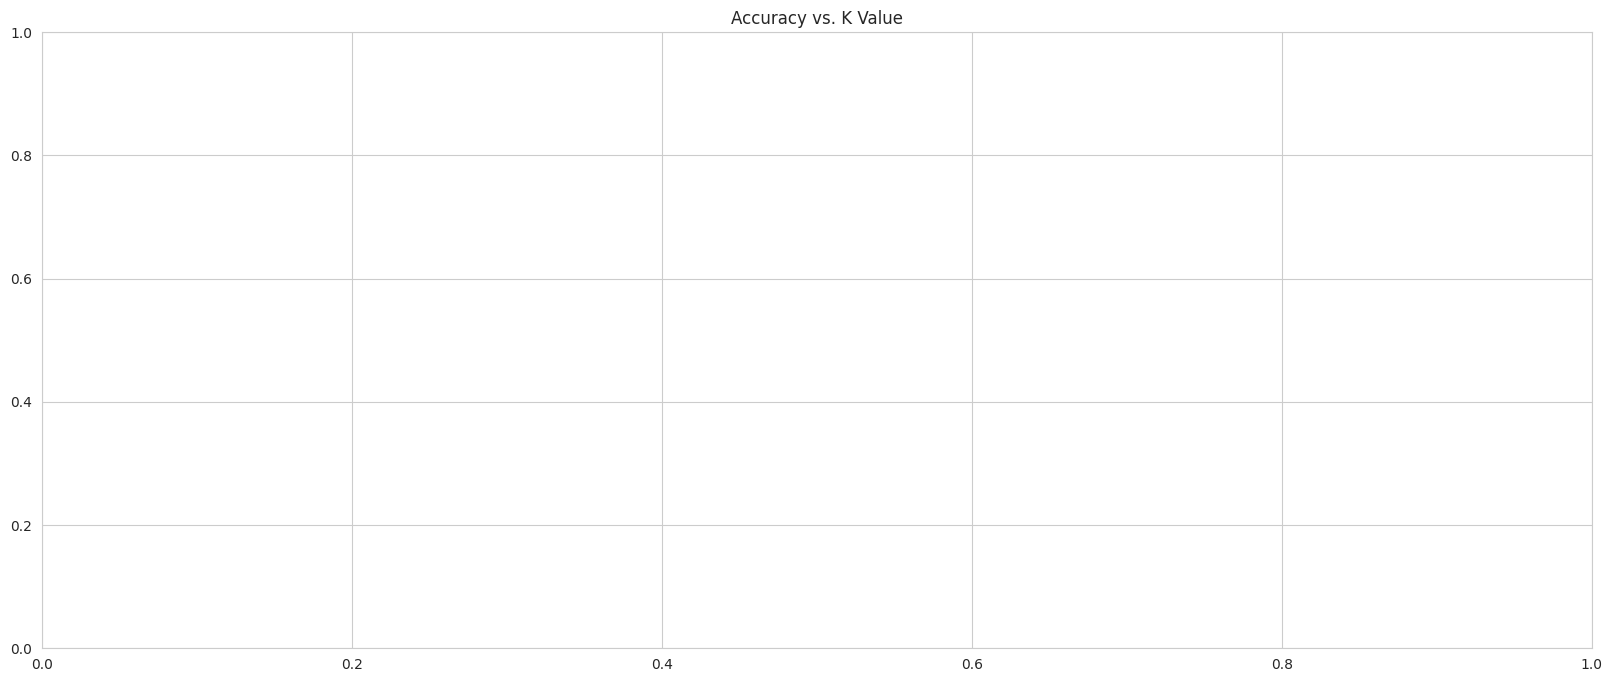

In [119]:
plt.figure(figsize=(20,8))
plt.title('Accuracy vs. K Value')
sns.lineplot(unchanged_test_scores,marker='o',label='Unscaled data test score')
sns.lineplot(scaled_test_scores,marker='o',label='Scaled data test Score')

# TASK-7: Refer to MinMax Scaler provided in scikit-learn.

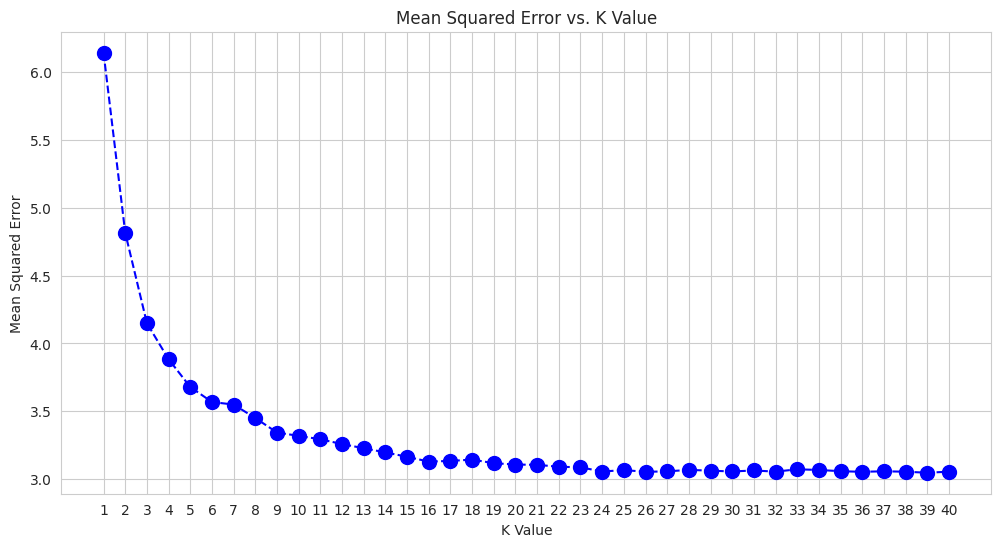

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

# Sample data loading for illustration, replace with your actual data
# df = pd.read_csv('path_to_your_csv_file.csv')

# Assuming 'Rating' is the target variable and the rest are features
X = super_data.drop('Rating', axis=1)
y = super_data['Rating']

# Identify columns with string (object) dtype
object_cols = X.select_dtypes(include=['object']).columns

# Apply Label Encoding to convert string columns to numerical
label_encoder = LabelEncoder()
for col in object_cols:
    X[col] = label_encoder.fit_transform(X[col])

# Handle missing values
# Initialize the imputer
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like 'median', 'most_frequent', etc.

# Fit the imputer on the entire data and transform both training and testing data
X = imputer.fit_transform(X)

# Scale features using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

error_rate = []

# Loop through different K values (let's say 1 to 40)
for k in range(1, 41):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    error_rate.append(mean_squared_error(y_test, y_pred))

# Plot the error rates for different K values
plt.figure(figsize=(12, 6))
plt.plot(range(1, 41), error_rate, marker='o', linestyle='dashed', color='blue', markersize=10)
plt.title('Mean Squared Error vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error')
plt.xticks(range(1, 41))  # Optional: To ensure all K values are visible on the x-axis
plt.grid(True)  # Optional: To add grid lines for better readability
plt.show()


TASK-8:
### Plot the voronoi diagram for the TASK-7

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor # Use Regressor for continuous target
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from scipy.spatial import Voronoi, voronoi_plot_2d

# ... (Rest of the code remains the same)

# Train a KNN regressor with a chosen K value
k = 5  # Choose an appropriate K value
knn = KNeighborsRegressor(n_neighbors=k) # Change to KNeighborsRegressor
knn.fit(X, y)

# ... (Rest of the code remains the same)

KNeighborsRegressor()

### TASK-9: Use K-Fold cross validation on all the above classification experiments and present an analysis of the results you obtain.

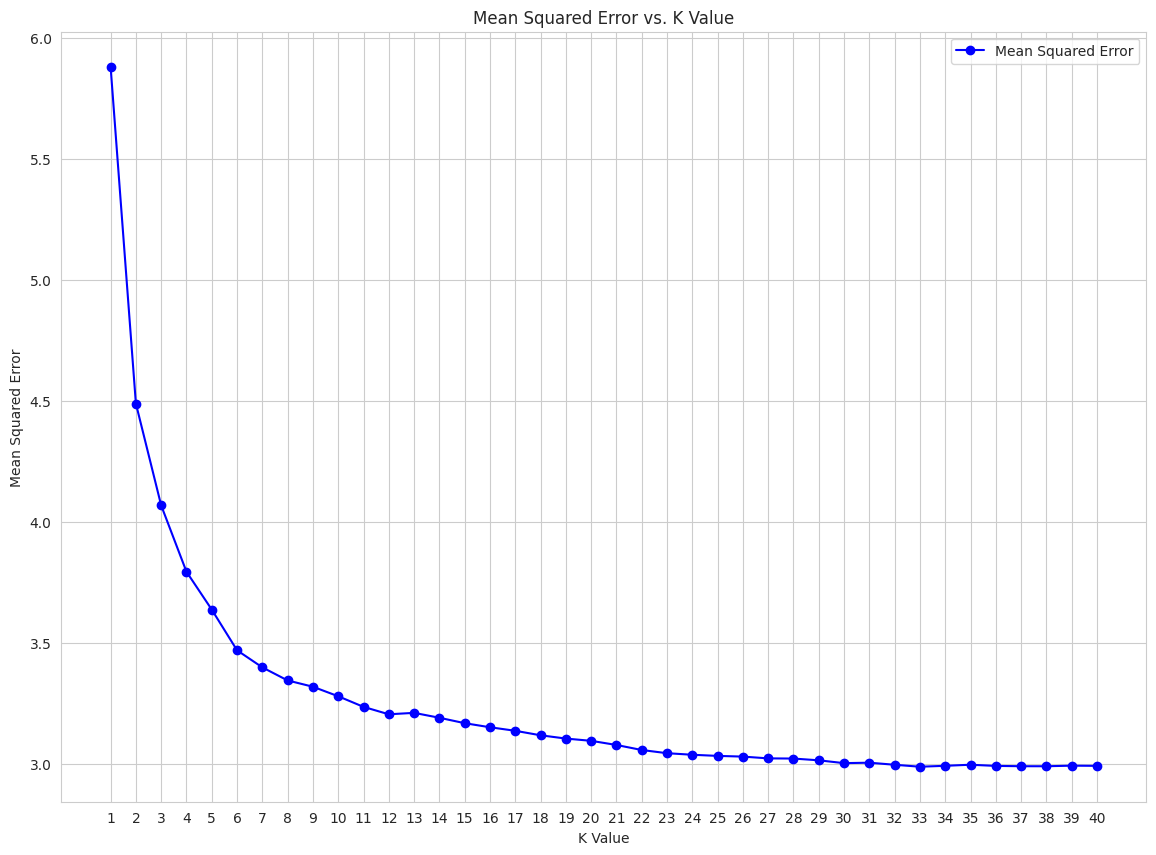

Approximate Optimal K Value: 33


In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsRegressor # Use Regressor for continuous target
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error # Use MSE for regression

# ... (Rest of the code remains the same)

mse_list = [] # Initialize an empty list to store MSE values

# Loop through different K values (let's say 1 to 40)
for k in range(1, 41):
    fold_errors = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)

        fold_errors.append(mean_squared_error(y_test, y_pred))

    mse_list.append(np.mean(fold_errors))

# Plot MSE vs. K Value
plt.figure(figsize=(14, 10))
plt.plot(range(1, 41), mse_list, marker='o', linestyle='-', color='blue', label='Mean Squared Error')
plt.title('Mean Squared Error vs. K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Squared Error')
plt.xticks(range(1, 41))
plt.grid(True)
plt.legend()
plt.show()

# Find optimal K (approximately)
optimal_k_index = np.argmin(mse_list)
optimal_k = optimal_k_index + 1  # Since K starts from 1

print("Approximate Optimal K Value:", optimal_k)

# Retrain model with optimal K and evaluate on a separate test set (if available)
# ...


# Conclusion

From our data analysis, we've observed a notable correlation between BMI, the number of pregnancies, the pedigree function, and diabetes test results.

In terms of classification performance, the models using standardized data consistently outperformed those using unscaled data across a range of K-values. This highlights the significant impact of feature scaling on improving machine learning model accuracy and robustness.